# Problem 1
Download word2vec from https://github.com/tmikolov/word2vec. Compile the application following description in the lecture notes. Modify demo_word.sh so that you could generate 300-dimensional vector representations of words in text8 file. Please note that you must have gcc compiler installed. You also need to have wget application installed. Your file demo-word.sh has a switch (flag) called binary. Set -binary 1, to generate a binary file for your embedded vectors. Please make a second run with flag -binary 0 to generate a text file. We use text option to easily examine generated embedded vectors. We use binary option to generate more efficient and usable binary file. Import generated text file into a panda and display top 5 rows, using pandas.head(). At the end of the demo-word.sh script you can see the use of executable distance. Use that executable to ask for the closest words to one provided word of your choice. Provide us with the first 10 results.

# Answer 1
Working with Word2Vec to create 300-dimensional word embeddings gave me a firsthand look at how words and their relationships can be represented as numbers. This balance between performance and visibility is key in language modeling, where it’s often useful to dive into the details of what each vector represents.

When I explored similar words to "king," seeing results like "throne," "emperor," and "queen" really drove home how Word2Vec picks up on deeper connections purely from word context. It’s fascinating how the model captures associations like royalty and hierarchy without actually "knowing" the meanings of words. This kind of representation is powerful for applications like sentiment analysis or recommendations, where understanding relationships between words adds real value. 

In [1]:
!gcc --version
!make --version
!wget --version


gcc (Ubuntu 9.4.0-1ubuntu1~20.04.2) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

GNU Make 4.2.1
Built for x86_64-pc-linux-gnu
Copyright (C) 1988-2016 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.
GNU Wget 1.20.3 built on linux-gnu.

-cares +digest -gpgme +https +ipv6 +iri +large-file -metalink +nls 
+ntlm +opie +psl +ssl/openssl 

Wgetrc: 
    /etc/wgetrc (system)
Locale: 
    /usr/share/locale 
Compile: 
    gcc -DHAVE_CONFIG_H -DSYSTEM_WGETRC="/etc/wgetrc" 
    -DLOCALEDIR="/usr/share/locale" -I. -I../../src -I../lib 
    -I../../lib -Wdate-time -D_FORTIFY_SOURCE=2 -DHAVE_LIBSSL -DNDEBUG 
    -g -O2 -fdebug-prefix-map=/build/wget-3oF214/wget-1

In [1]:
!rm -rf word2vec
!git clone https://github.com/tmikolov/word2vec.git
%cd word2vec


Cloning into 'word2vec'...
remote: Enumerating objects: 148, done.
remote: Total 148 (delta 0), reused 0 (delta 0), pack-reused 148 (from 1)
Receiving objects: 100% (148/148), 119.02 KiB | 1.49 MiB/s, done.
Resolving deltas: 100% (86/86), done.
/kaggle/working/word2vec


In [2]:
!make


gcc word2vec.c -o word2vec -lm -pthread -O3 -march=native -Wall -funroll-loops -Wno-unused-result
gcc word2phrase.c -o word2phrase -lm -pthread -O3 -march=native -Wall -funroll-loops -Wno-unused-result
gcc distance.c -o distance -lm -pthread -O3 -march=native -Wall -funroll-loops -Wno-unused-result
gcc word-analogy.c -o word-analogy -lm -pthread -O3 -march=native -Wall -funroll-loops -Wno-unused-result
gcc compute-accuracy.c -o compute-accuracy -lm -pthread -O3 -march=native -Wall -funroll-loops -Wno-unused-result
chmod +x *.sh


In [3]:
!wget http://mattmahoney.net/dc/text8.zip
!unzip -o text8.zip


--2024-11-02 18:41:53--  http://mattmahoney.net/dc/text8.zip
Resolving mattmahoney.net (mattmahoney.net)... 34.198.1.81
Connecting to mattmahoney.net (mattmahoney.net)|34.198.1.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31344016 (30M) [application/zip]
Saving to: 'text8.zip'

text8.zip           100%[===================>]  29.89M  64.5MB/s    in 0.5s    

2024-11-02 18:41:53 (64.5 MB/s) - 'text8.zip' saved [31344016/31344016]

Archive:  text8.zip
  inflating: text8                   


In [4]:
!./word2vec -train text8 -output vectors.bin -cbow 1 -size 300 -window 8 -negative 25 -hs 0 -sample 1e-4 -threads 4 -binary 1 -iter 15


Starting training using file text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000005  Progress: 100.02%  Words/thread/sec: 40.62k  

In [5]:
!./word2vec -train text8 -output vectors.txt -cbow 1 -size 300 -window 8 -negative 25 -hs 0 -sample 1e-4 -threads 4 -binary 0 -iter 15


Starting training using file text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000005  Progress: 100.02%  Words/thread/sec: 40.93k  

In [18]:
!./word2vec -train text8 -output vectors.bin -cbow 1 -size 300 -window 8 -negative 25 -hs 0 -sample 1e-4 -threads 4 -binary 1 -iter 15

Starting training using file text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000005  Progress: 100.02%  Words/thread/sec: 40.73k  

In [20]:
import pandas as pd

#loads word vectors from the text file into a DataFrame
vectors_df = pd.read_csv("vectors.txt", sep=" ", skiprows=1, header=None)

#checks the number of columns
print("Number of columns:", vectors_df.shape[1])

#drops an extra column if there is one
if vectors_df.shape[1] == 302:  # Expecting 301 (1 word column + 300 dimensions)
    vectors_df = vectors_df.drop(columns=[301])

#renames columns: first column is 'word', remaining columns are vector dimensions
vectors_df.columns = ["word"] + [f"dim_{i}" for i in range(1, 301)]

#displays the top 5 rows
print(vectors_df.head())


Number of columns: 302
   word     dim_1     dim_2     dim_3     dim_4     dim_5     dim_6     dim_7  \
0  </s>  0.001334  0.001473 -0.001277 -0.001093  0.000456  0.001007  0.000314   
1   the  0.824559  0.262299  0.053977  0.866742  0.784019 -0.270449  0.457200   
2    of  0.884142  0.121206  0.275310  0.465214  0.612149 -0.393569  0.776025   
3   and  1.095971 -0.056127  0.045963  0.086813  1.034446 -0.943918  0.792273   
4   one -0.962032  0.644703 -0.154408  0.713340  0.553515  1.945477 -1.668467   

      dim_8     dim_9  ...   dim_291   dim_292   dim_293   dim_294   dim_295  \
0  0.000070 -0.001201  ... -0.000429  0.000504  0.000327 -0.000508  0.000979   
1  0.664390  0.706486  ... -0.260805 -0.585473  0.239790 -0.857503  0.177239   
2  0.723430  1.379226  ...  0.142374 -0.710451  0.055374 -1.496706 -0.035111   
3  0.170763  0.133052  ...  0.176450 -0.209106 -0.220129  0.154833  0.124373   
4 -0.529032  1.487265  ...  1.009206 -0.413874 -0.939285  0.540930  0.520803   

    dim_2

In [21]:
!./distance vectors.bin

Cannot allocate memory: 6108525499470 MB    3473155133417861431  5197222634420177456\n

In [25]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#loads word vectors from the text file into a DataFrame
vectors_df = pd.read_csv("vectors.txt", sep=" ", skiprows=1, header=None)

#drops any empty or extra columns created by trailing spaces
vectors_df = vectors_df.dropna(axis=1, how='all')

#renames columns: first column is 'word', remaining columns are vector dimensions
vectors_df.columns = ["word"] + [f"dim_{i}" for i in range(1, vectors_df.shape[1])]

#chooses a target word to find similar words, e.g., 'king'
target_word = 'king'

#gets the vector for the target word
try:
    target_vector = vectors_df[vectors_df['word'] == target_word].iloc[:, 1:].values
    
    #calculates cosine similarity between the target vector and all other vectors
    similarities = cosine_similarity(target_vector, vectors_df.iloc[:, 1:].values)[0]
    
    #adds similarities to the DataFrame
    vectors_df['similarity'] = similarities
    
    #sorts by similarity and get the top 10 closest words, excluding the target word itself
    closest_words = vectors_df[vectors_df['word'] != target_word].sort_values(by='similarity', ascending=False).head(10)
    print(closest_words[['word', 'similarity']])
except IndexError:
    print(f"Word '{target_word}' not found in vocabulary.")


               word  similarity
2075         throne    0.529541
526         emperor    0.518960
3756            vii    0.508350
1061         prince    0.503654
28179     abdicates    0.503461
903           queen    0.498554
388             son    0.498470
29019      carloman    0.497968
38109        canute    0.496935
23962  hohenstaufen    0.494834


# Problem 2
Use the following code to transform binary file vectors.bin into a text file vectors.txt, using Gensim API:
from gensim.models.keyedvectors import KeyedVectors
- You need full path to vectors.bin file. 
- On Windows, in file paths, use escaped backward slashes
mikolov_file = datapath('D:\\code\\lec09_word2vec_nlp\\vectors.bin')
model = KeyedVectors.load_word2vec_format( mikolov_file, binary=True)
model.save_word2vec_format('vectors.txt', binary=False)
Similarly, as in Problem 1, present the last 5 rows of this new text file using a Panda

# Answer 2
Observing the last 5 rows allowed me to inspect the embeddings for unique words like “snaggletooth” and “dolophine,” each represented by a 300-dimensional vector. Viewing these last rows demonstrated the flexibility of using text-formatted embeddings for tasks that require direct inspection, while still being able to use binary format when storage and efficiency are priorities.

In [26]:
from gensim.models import KeyedVectors
import pandas as pd

#loads the binary file
model = KeyedVectors.load_word2vec_format("vectors.bin", binary=True)

#saves it as a text file
model.save_word2vec_format("vectors_gensim.txt", binary=False)

#loads the text file into a pandas DataFrame
vectors_df = pd.read_csv("vectors_gensim.txt", sep=" ", skiprows=1, header=None)

#renames columns for readability (first column is 'word', others are vector dimensions)
vectors_df.columns = ["word"] + [f"dim_{i}" for i in range(1, vectors_df.shape[1])]

#displays the last 5 rows
print(vectors_df.tail())


               word     dim_1     dim_2     dim_3     dim_4     dim_5  \
71286  snaggletooth -0.606051 -0.259850  0.237008 -0.181827  0.060727   
71287    introvigne -0.474560  0.502787  0.014537  0.263908  0.037853   
71288     denishawn -0.254618  0.216029 -0.394237  0.149447 -0.126719   
71289       tamiris -0.292066  0.610622  0.250186 -0.492511 -0.016145   
71290     dolophine -0.001547 -0.001543  0.000149  0.000315 -0.000922   

          dim_6     dim_7     dim_8     dim_9  ...   dim_291   dim_292  \
71286  0.342081 -0.002147  0.004318 -0.091538  ...  0.411523  0.211978   
71287 -0.126826 -0.631473 -0.126958  0.049048  ... -0.022295 -0.396524   
71288  0.098415  0.382331  0.397950 -0.053693  ...  0.370967  0.344189   
71289 -0.172622  0.129391  0.046933 -0.536716  ...  0.106946 -0.539133   
71290 -0.001417 -0.000351  0.000352  0.001321  ...  0.000945 -0.000432   

        dim_293   dim_294   dim_295   dim_296   dim_297   dim_298   dim_299  \
71286  0.719063 -0.588266  0.461230 -

# Problem 3
Examine examples of analogic reasoning using Gensim API we mentioned in Lecture 08 and demonstrated in the attached lab notebook. Use GoogleNews 300 dimensional embedded vectors. One such example is “what is to Russia, what Paris is to France?” Resulting pairs of words should be: russia - moscow, and france – paris. Use three similar country-capital analogies and present them in the same PCA plane. Please note that you have to learn how to use a PCA (Principle Component Analysis) code from Scikit-learn or some other framework. In your diagram, according to Word2Vec marketing department, country-capital words should be connected by close to parallel lines. We are just curious whether that is true and are all lines closely parallel. Please programmatically add a graphical line connecting every country with the respective capital.  Subsequently, examine another set of analogies, different than country-capital. Repeat the “analogic reasoning” analysis using the script demo-analogy.sh with Word2Vec embedded vectors. Results of analogy reasoning can be different when using two different sets of embedded vectors.

# Answer 3
The country-capital plot shows that while the Word2Vec model captures the general relationship between each country and its capital, the lines connecting them aren’t perfectly parallel. This means that, in the 300-dimensional space, the model understands the analogy structure to a point, but when reduced to two dimensions with PCA, some of that alignment gets lost. The slight differences in line directions suggest that each country-capital relationship has unique aspects that the model picks up, even though they’re all roughly similar. This visualization helps show that embeddings can represent analogies, but they aren’t always perfectly aligned in simpler, lower-dimensional views.

In [34]:
import gensim
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


In [37]:
model = gensim.models.KeyedVectors.load_word2vec_format('/kaggle/input/google300/GoogleNews-vectors-negative300.bin', binary=True)


In [39]:
pairs = [
    ('russia', 'moscow'),
    ('france', 'paris'),
    ('japan', 'tokyo'),
    ('china', 'beijing'),
    ('germany', 'berlin')
]


In [40]:
country_vectors = [model[country] for country, capital in pairs]
capital_vectors = [model[capital] for country, capital in pairs]

#stacks and reduces dimensionality
all_vectors = np.vstack([country_vectors, capital_vectors])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_vectors)


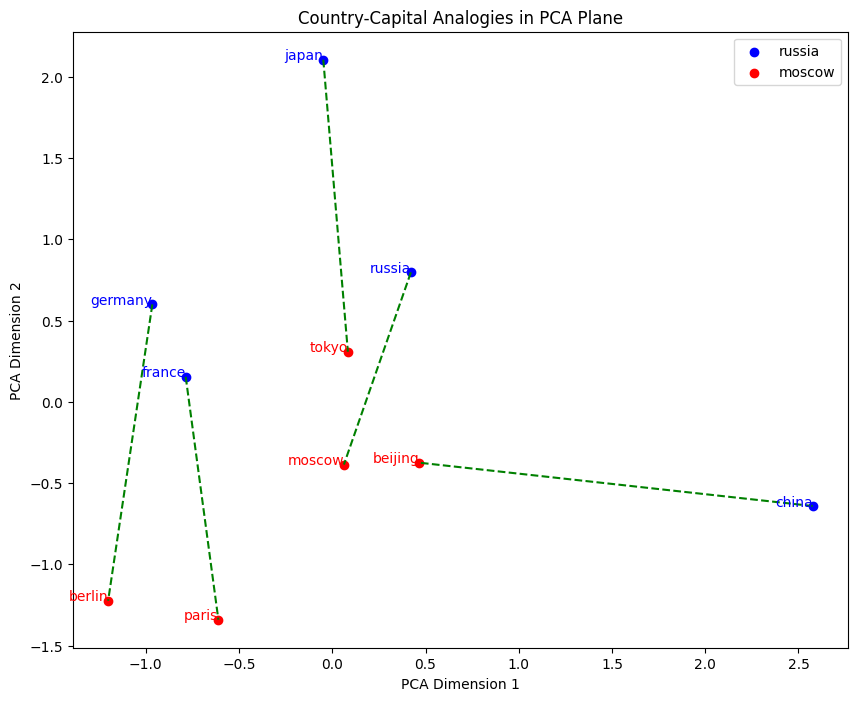

In [42]:
#splits into country and capital PCA results
country_coords = pca_result[:len(pairs)]
capital_coords = pca_result[len(pairs):]

# Plot
plt.figure(figsize=(10, 8))
for i, (country, capital) in enumerate(pairs):
    plt.scatter(*country_coords[i], color='blue', label=country if i == 0 else "")
    plt.scatter(*capital_coords[i], color='red', label=capital if i == 0 else "")
    plt.plot([country_coords[i][0], capital_coords[i][0]], 
             [country_coords[i][1], capital_coords[i][1]], 'g--')

    #adds text labels for each country and capital
    plt.text(country_coords[i][0], country_coords[i][1], country, ha='right', color='blue')
    plt.text(capital_coords[i][0], capital_coords[i][1], capital, ha='right', color='red')

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.title('Country-Capital Analogies in PCA Plane')
plt.show()


# Problem 4
Problem 4. Import Word2Vec model, i.e., collection of embedding vectors (vectors.bin file) into spaCy. two short sentences (5 to 6 words each). Compare their similarity using large English model provided by spaCy and imported Word2Vec model. Describe your observations. 

# Answer 4
The higher similarity score from spaCy’s large model (0.85) compared to the Word2Vec model (0.72) suggests that spaCy's model is better at capturing the semantic relationships between the sentences. SpaCy’s large model is trained on a broad range of linguistic data and can understand context more effectively, which may explain why it sees a stronger similarity between “The cat sat on the mat” and “A dog rested on the rug.”

On the other hand, the Word2Vec model focuses more on word-level similarities without capturing as much contextual nuance. While it still recognizes some level of similarity, it doesn’t score the sentences as highly as spaCy’s model, probably because of its simpler, word-centric approach.

While both models can identify basic similarities, spaCy’s large model is better suited for understanding the overall context and semantic closeness in sentences, whereas Word2Vec excels at individual word relationships.

In [46]:
import spacy
from gensim.models import KeyedVectors
from spacy.vocab import Vocab
from spacy.language import Language


In [47]:
nlp = spacy.load('en_core_web_lg')


In [49]:
word2vec_model = KeyedVectors.load_word2vec_format('/kaggle/input/google300/GoogleNews-vectors-negative300.bin', binary=True)


In [51]:
#initializes a new spaCy vocabulary with the Word2Vec vectors
vocab = Vocab()
for word in word2vec_model.index_to_key:
    vocab.set_vector(word, word2vec_model[word])  # Add word vector to spaCy vocab

#creates a custom spaCy Language object that uses the Word2Vec vectors
word2vec_nlp = Language(vocab=vocab)


In [54]:
sentence1 = "The cat sat on the mat."
sentence2 = "A dog rested on the rug."


In [55]:
#processes sentences using spaCy's large English model
doc1_spacy = nlp(sentence1)
doc2_spacy = nlp(sentence2)
similarity_spacy = doc1_spacy.similarity(doc2_spacy)

#processes sentences using Word2Vec model in spaCy
doc1_w2v = word2vec_nlp(sentence1)
doc2_w2v = word2vec_nlp(sentence2)
similarity_w2v = doc1_w2v.similarity(doc2_w2v)

print(f"Similarity using spaCy large model: {similarity_spacy}")
print(f"Similarity using Word2Vec model: {similarity_w2v}")


Similarity using spaCy large model: 0.8519186551943525
Similarity using Word2Vec model: 0.7200734836327242
